In [ ]:
pip install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x55a79144c000 @  0x7fa802142615 0x55a7575bc4cc 0x55a75769c47a 0x55a7575bf2ed 0x55a7576b0e1d 0x55a757632e99 0x55a75762d9ee 0x55a7575c0bda 0x55a757632d00 0x55a75762d9ee 0x55a7575c0bda 0x55a75762f737 0x55a7576b1c66 0x55a75762edaf 0x55a7576b1c66 0x55a75762edaf 0x55a7576b1c66 0x55a75762edaf 0x55a7575c1039 0x55a757604409 0x55a7575bfc52 0x55a757632c25 0x55a75762d9ee 0x55a7575c0bda 0x55a75762f737 0x55a75762d9ee 0x55a7575c0bda 0x55a75762e915 0x55a7575c0afa 0x55a75762ec0d 0x55a75762d9ee
     |████████████████████████████████| 881.9 MB 19 kB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 2.9 MB 34.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1

italicized text# Exercise 1

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.3081,],std=[0.1306,])])
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transform)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
torch.cuda.is_available()
train_accu = []
test_accu = []
models_name = []

cpu


In [ ]:
def model_train_and_test(model):  
  cur_train_accu = []
  cur_eval_accu =[]
  model.to(device)
  ce_loss = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  correct = 0
  total = 0
  running_loss=0
  for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()

        images = images.view(-1, input_size)  # -1 in batch dim!
        outputs = model(images)
        loss = ce_loss(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accu=100.*correct/total
         
    cur_train_accu.append(accu)
    correct = 0
    total = 0
    running_loss=0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        images = images.view(-1, input_size)
        outputs = model(images)
        predicted = torch.argmax(outputs, 1)
        correct += (predicted == labels).sum()
    
        test_loss=running_loss/len(test_loader)
        accu=100.*correct/total
        total += labels.size(0)
    cur_eval_accu.append(accu)
  print('Accuracy of the model on the 10000 test images: {:.2f}'.format(float(correct) / total))
    
  train_accu.append(cur_train_accu)
  test_accu.append(cur_eval_accu)
  models_name.append(str(type(model)).split('_')[-3:-1])


In [ ]:
input_size = 784  #28*28
num_classes = 10

num_epochs = 20
batch_size = 128
learning_rate = 0.001

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
class NN_tanH_2_layers(nn.Module):
    def __init__(self, input_dim: int, out_dim: int):
        super(NN_tanH_2_layers, self).__init__()
        self.fc1 = nn.Linear(input_dim,  (input_dim-out_dim)//2)
        self.fc2 = nn.Linear((input_dim-out_dim)//2, out_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        return x


In [ ]:
model = NN_tanH_2_layers(input_dim = input_size, out_dim = num_classes)
model = model.to(device)
model_train_and_test(model)


In [ ]:
class NN_tanH_3_layers(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super(NN_tanH_3_layers, self).__init__()
        self.fc1 = nn.Linear(in_dim,  (in_dim-out_dim)//2)
        self.fc2 = nn.Linear((in_dim-out_dim)//2, (in_dim-out_dim)//4)
        self.fc3 = nn.Linear((in_dim-out_dim)//4, out_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        return x


In [ ]:
model = NN_tanH_3_layers(in_dim = input_size, out_dim = num_classes)
model = model.to(device)
model_train_and_test(model)

In [ ]:
class NN_tanH_4_layers(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super(NN_tanH_4_layers, self).__init__()
        self.fc1 = nn.Linear(in_dim,  (in_dim-out_dim)//2)
        self.fc2 = nn.Linear((in_dim-out_dim)//2, (in_dim-out_dim)//4)
        self.fc3 = nn.Linear((in_dim-out_dim)//4, (in_dim-out_dim)//8)
        self.fc4 = nn.Linear((in_dim-out_dim)//8, out_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        x = torch.tanh(x)
        x = self.fc4(x)
        return x

In [ ]:
model = NN_tanH_4_layers(in_dim = input_size, out_dim = num_classes)
model = model.to(device)
model_train_and_test(model)

In [ ]:
class NN_relu_2_layers(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super(NN_relu_2_layers, self).__init__()
        self.fc1 = nn.Linear(in_dim,  (in_dim-out_dim)//2)
        self.fc2 = nn.Linear((in_dim-out_dim)//2, out_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
model = NN_relu_2_layers(in_dim = input_size, out_dim = num_classes)
model = model.to(device)
model_train_and_test(model)

In [ ]:
class NN_relu_3_layers(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super(NN_relu_3_layers, self).__init__()
        self.fc1 = nn.Linear(in_dim,  (in_dim-out_dim)//2)
        self.fc2 = nn.Linear((in_dim-out_dim)//2, (in_dim-out_dim)//4)
        self.fc3 = nn.Linear((in_dim-out_dim)//4, out_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x


In [ ]:
model = NN_relu_3_layers(in_dim = input_size, out_dim = num_classes)
model = model.to(device)
model_train_and_test(model)

In [ ]:
class NN_relu_4_layers(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super(NN_relu_4_layers, self).__init__()
        self.fc1 = nn.Linear(in_dim,  (in_dim)//2)
        self.fc2 = nn.Linear((in_dim)//2, (in_dim)//4)
        self.fc3 = nn.Linear((in_dim)//4, (in_dim)//8)
        self.fc4 = nn.Linear((in_dim)//8, out_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x

In [ ]:
model = NN_relu_4_layers(in_dim = input_size, out_dim = num_classes)
model = model.to(device)
model_train_and_test(model)

At first we will check if increasing the epocs number will increase the performences of our newtwork.

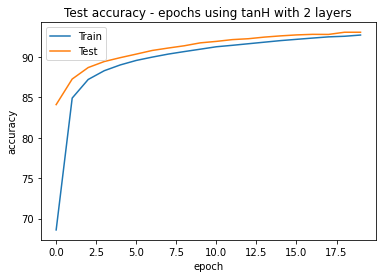

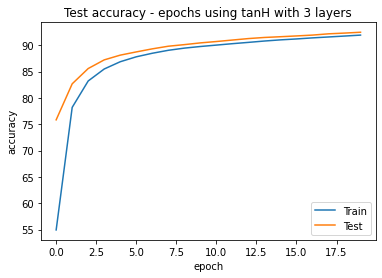

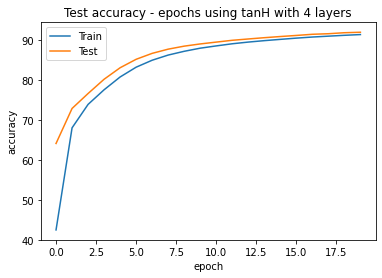

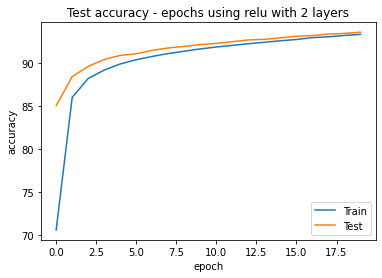

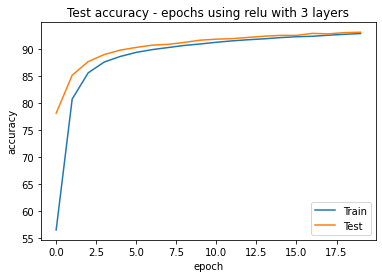

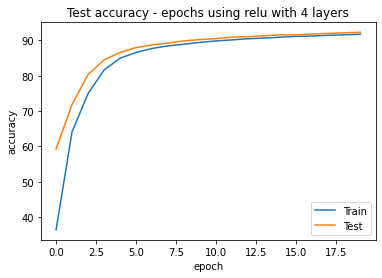

In [ ]:
for i in range(6):
  plt.plot(train_accu[i])
  plt.plot(test_accu[i])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Test accuracy - epochs using '+models_name[i][0] + ' with ' + models_name[i][1] + ' layers'  )
  plt.legend(['Train','Test'])
  plt.show()

looking at the graphs of each network, for all of them increasing the epoch number results in increase in the test accurcay.

Now,we will compare the diffrent between diffrent numbers of layers:

In [ ]:
def plot_diff_layers(activation_fucntion):
  activation_function_train = [train_accu[i] for i in range(6) if (models_name[i][0] == activation_fucntion)]
  activation_function_test = [test_accu[i] for i in range(6) if (models_name[i][0] == activation_fucntion)]
  layers_sizes = [2,3,4]
  for i in range(3):
    plt.plot(activation_function_test[i],label =str(layers_sizes[i]) +'layers')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Test accuracy - epochs using ' + str(activation_fucntion))
  plt.legend(['2 layers','3 layers','4 layers'])
  plt.show()


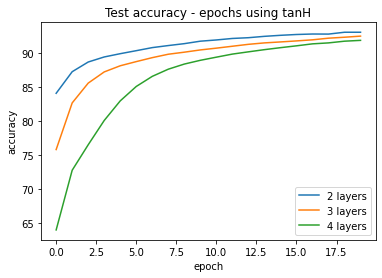

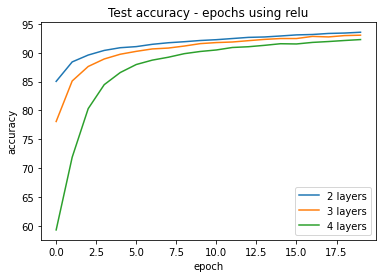

In [ ]:
plot_diff_layers('tanH')
plot_diff_layers('relu')

We can see that for both tanH and relu, choosing 2 layers is the optimal senrio as it outperform 3 and 4 layers along the whole graph. The differnce is getting smaller but 2 is getting a higher test accuracy than 3 and 4. So in order to compare relu and tanH I will choose the 2 layers form of both of them. sience we want to comapre them will using 2 layers(optimial for the both of them) 

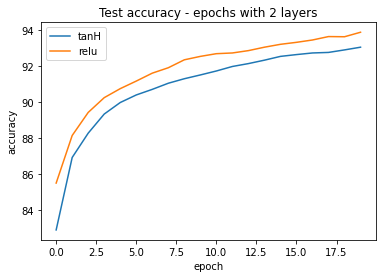

In [ ]:
plt.plot(test_accu[0])
plt.plot(test_accu[3])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy - epochs with ' + str(2) +' layers')
plt.legend(['tanH','relu'])
plt.show()

And thats why relu_2_layers is the optimial newtwork in the cases i checked

# Exercise 2

In [ ]:
input_size = 784  #28*28
num_classes = 2

num_epochs = 1500
batch_size = 128
learning_rate = 0.01

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.3081,],std=[0.1306,])])
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transform)
propabilities_train = 0.5*torch.ones(batch_size)
train_dataset.targets = torch.bernoulli(propabilities_train)
train_loader = torch.utils.data.DataLoader(dataset=[train_dataset[i] for i in range(128)], 
                                           batch_size=batch_size, 
                                           shuffle=False)

train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transform,
                               download=True)
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transform)
propabilities_test = 0.5*torch.ones(len(test_dataset))
test_dataset.targets = torch.bernoulli(propabilities_test)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
model = NN_relu_2_layers(in_dim = input_size, out_dim = 2)
model = model.to(device)
model_train_and_test2(model)

Epoch [1/1500], Train loss: 0.9347;Test loss: 1.38
Epoch [51/1500], Train loss: 0.3242;Test loss: 0.91
Epoch [101/1500], Train loss: 0.1668;Test loss: 0.98
Epoch [151/1500], Train loss: 0.0974;Test loss: 1.06
Epoch [201/1500], Train loss: 0.0646;Test loss: 1.15
Epoch [251/1500], Train loss: 0.0463;Test loss: 1.22
Epoch [301/1500], Train loss: 0.0350;Test loss: 1.29
Epoch [351/1500], Train loss: 0.0277;Test loss: 1.35
Epoch [401/1500], Train loss: 0.0225;Test loss: 1.40
Epoch [451/1500], Train loss: 0.0188;Test loss: 1.45
Epoch [501/1500], Train loss: 0.0161;Test loss: 1.49
Epoch [551/1500], Train loss: 0.0139;Test loss: 1.53
Epoch [601/1500], Train loss: 0.0122;Test loss: 1.56
Epoch [651/1500], Train loss: 0.0108;Test loss: 1.59
Epoch [701/1500], Train loss: 0.0097;Test loss: 1.62
Epoch [751/1500], Train loss: 0.0088;Test loss: 1.65
Epoch [801/1500], Train loss: 0.0080;Test loss: 1.67
Epoch [851/1500], Train loss: 0.0073;Test loss: 1.70
Epoch [901/1500], Train loss: 0.0068;Test loss: 1

In [ ]:
train_losses = []
test_losses = []

train_accs = []
test_accs = []
def model_train_and_test2(model):  
  cur_train_accu2 = []
  cur_eval_accu2 =[]
 
  model.to(device)
  ce_loss = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  correct = 0
  total = 0
  for epoch in range(num_epochs):
    agg_train_loss = 0
    agg_test_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()

        images = images.view(-1, input_size)  # -1 in batch dim!
        outputs = model(images)
        loss = ce_loss(outputs, labels)
        loss.backward()
        optimizer.step()
        agg_train_loss += loss.item()
        
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accu=100.*correct/total
    cur_train_accu2.append(accu)
    train_losses.append(agg_train_loss / len(train_loader))
    correct = 0
    total = 0
    if epoch % 50 == 0:
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)

          images = images.view(-1, input_size)
          outputs = model(images)
          predicted = torch.argmax(outputs, 1)
          correct += (predicted == labels).sum()
          loss = ce_loss(outputs, labels)
          agg_test_loss += loss.item()
        
          accu=100.*correct/total
          total += labels.size(0)
      cur_eval_accu2.append(accu)
      test_losses.append(agg_test_loss / len(test_loader))
      
      print(f'Epoch [{epoch+1}/{num_epochs}], Train loss: {train_losses[-1]:.4f};Test loss: {test_losses[-1]:.2f}')



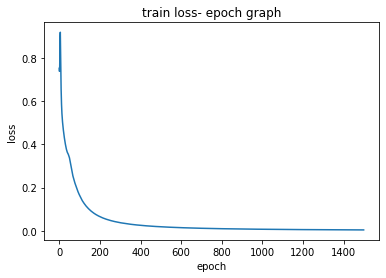

In [ ]:
plt.plot(train_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('train loss- epoch graph')
plt.show()

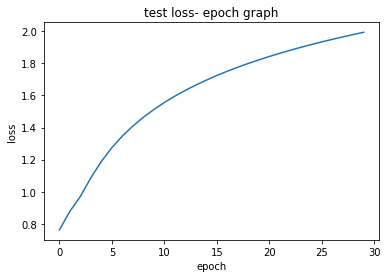

In [ ]:
plt.plot(test_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('test loss- epoch graph')
plt.show()

In [ ]:
print('The avergae test loss is: ' +str(sum(test_losses)/len(test_losses)))

The avergae test loss is:1.604103502744361


The average test loss is very high compred to the train loss because as we overfit more from the train we are learning not useful noise which hurts the genersnalition on the test set.